In [3]:

import matplotlib.pyplot as plt

# sudo pip install mcareader
import mcareader as mca
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy import optimize


In [15]:
average_annual_salery=60000
# https://www.9news.com.au/national/australias-average-salary-revealed-top-10-highest-paid-occupations/ee7ba156-9e52-4f64-99be-0f1187a8756b

food_daily_cost=300/7
# https://www.savings.com.au/credit-cards/the-average-australian-spends-300-a-week-on-food-and-its-blowing-out-our-budgets

# engel's coefficient
print("food daily cost: ", food_daily_cost)
print("engel's coefficient: ",food_daily_cost/(average_annual_salery/365))

food daily cost:  42.857142857142854
engel's coefficient:  0.26071428571428573


42.857142857142854

In [211]:
# physics constant
fine_str=1/137
m_e=9.10938356e-31 #kg
k=1.38e-23
C=299792458 #m/s 
Eme=m_e*C**2
h= 6.62607015e-34
keV=1e3*1.60217662e-19 #J
red_Comp_wl=h/(m_e*C*2*np.pi)

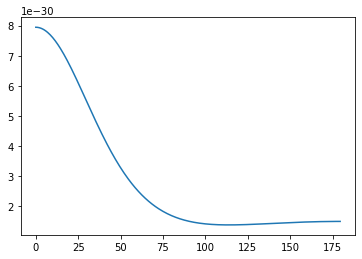

In [212]:
Ein=500*keV
kk=np.arange(0,180,0.5)
thita=kk/180*np.pi
P=1 / (1 + (Ein / (m_e * C**2) * (1-np.cos(thita)) ) )
d_cross_sec=1/2 * fine_str**2 * red_Comp_wl**2 * P**2 * (P+1/P-np.sin(thita)**2)
# print("the relative Compton scattering cross section",d_cross_sec," m2")
plt.plot(kk,d_cross_sec)

In [213]:
# from incident eneger and angle to output energy
Ein=657*keV
thita=90  #degree
thita=thita/180*np.pi
Eout= Ein/(1 + (Ein/(m_e*C**2)*(1-np.cos(thita))) )
print(Eout/keV,"keV")

287.43716667323366 keV


In [214]:
# from energy to angle
Ein=500*keV
Eout= 169.40016389*keV

alpha=np.arccos(1- ((Ein/Eout) - 1 )/(Ein/(m_e*C**2) ))
alpha=alpha / np.pi*180
print(alpha,"degree")
# Eout/keV

173.99999996343018 degree


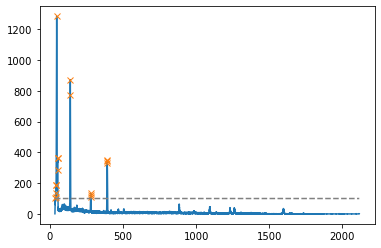

In [215]:
s1 = mca.Mca("Eu152_Calib_G2_Lab1_2021.MCA")
x, y = s1.get_points(calibration_method="interpolation")

# x[y>100]
height_peak=100
peaks, _ = find_peaks(y, height=height_peak)
plt.plot(x,y)
plt.plot(x[peaks], y[peaks], "x")
plt.plot(x,np.zeros_like(y)+height_peak, "--", color="gray")
plt.show()


##### The decay of 152Eu leads to γ-rays from 100keV to 1500 keV. to calibrate  The energies of the gamma-rays of interest are:
121.77 , 344.28 , 778.9 , 1408.01 keV


In [216]:
x[peaks]

array([ 38.07772926,  38.61441048,  39.68777293,  40.76113537,
        41.83449782,  46.39628821,  52.03144105,  52.83646288,
        53.64148472, 139.51048035, 140.04716157, 278.51091703,
       279.31593886, 279.85262009, 391.48231441, 392.01899563,
       392.55567686])

##### here we can see, the x data are which is aligned by software is not exactly correct, so I align it again by python

In [217]:
# y.max()
# x[np.argmax(y)]
x_data=np.array([139.51048035,392.01899563])
y_data=np.array([121.8,344.28])

def test_func(x, a, b):
    return a + b * x

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)


[-1.11978207  0.8810792 ]


c:\program files\python38\lib\site-packages\scipy\optimize\minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [218]:
a=params[0]
b=params[1]
x_aligned = a + b * x

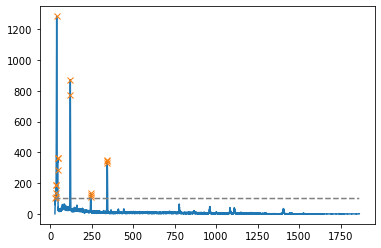

In [219]:
height_peak=100
peaks, _ = find_peaks(y, height=height_peak)
plt.plot(x_aligned,y)
plt.plot(x_aligned[peaks], y[peaks], "x")
plt.plot(x_aligned,np.zeros_like(y)+height_peak, "--", color="gray")
plt.show()

In [220]:
x_aligned[peaks]

array([ 32.42971307,  32.90257173,  33.84828905,  34.79400637,
        35.7397237 ,  39.75902231,  44.72403826,  45.43332625,
        46.14261424, 121.8       , 122.27285866, 244.2703932 ,
       244.97968119, 245.45253985, 343.80714134, 344.28      ,
       344.75285866])

##### A single 137Cs decay emits a single γ-ray at 661.66 keV. to investigate Compton scattering


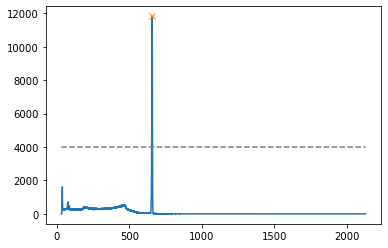

In [221]:
s3 = mca.Mca("energy_spectrum_d1_p1.MCA")
x3, y3 = s3.get_points(calibration_method="interpolation")
real_time3 = float(s3.get_variable("REAL_TIME"))
# x[y>100]
height_peak=4000
peaks, _ = find_peaks(y3, height=height_peak)
plt.plot(x3,y3)
plt.plot(x3[peaks], y3[peaks], "x")
plt.plot(x3,np.zeros_like(y3)+height_peak, "--", color="gray")
plt.show()

In [222]:
# print(peaks,"\n",x3[peaks],"\n",y3[peaks[1]-20:peaks[1]+20])
print(peaks,"\n",x3[peaks],"\n",real_time3)
Ein=x3[peaks]
Ein_137Cs=Ein[0]
Ein_137Cs

[2334] 
 [657.40786026] 
 62.613333


657.4078602620087

##### after the gamma ray photon being compton scattered, its energy should be changed, so the detector 2 should get different spectra from detector 1

sampling time  86.773333 sampling number  20046.0 sampling rate 231.01567390525383


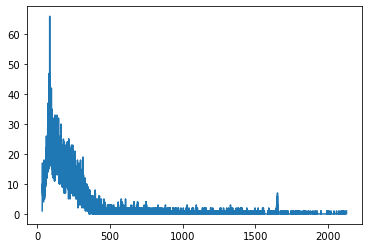

In [223]:
s5 = mca.Mca("ENERGY_SPECTRUM_D2_P1.MCA")
x5,y5 = s5.get_points(calibration_method="interpolation")

# Get some data from the file
real_time5 = float(s5.get_variable("REAL_TIME"))
samp_num5=sum(y5)
samp_rat5=samp_num5/real_time5
print("sampling time ",real_time5,"sampling number ",samp_num5,"sampling rate",samp_rat5)


s5.plot()


##### here because the compton scattering occurance frequency is small compared with background noise, we need to substrate the background noise from data

In [224]:
sum(y5)/real_time5

231.01567390525383

sampling time  117.213333 sampling number  11574.0 sampling rate 98.74303292783253


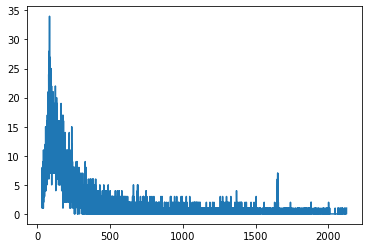

In [225]:
s4 = mca.Mca("ENERGY_SPECTRUM_D2_background.MCA")
x4,y4 = s4.get_points(calibration_method="interpolation")
real_time4 = float(s4.get_variable("REAL_TIME"))
samp_num4=sum(y4)
samp_rat4=samp_num4/real_time4
print("sampling time ",real_time4,"sampling number ",samp_num4,"sampling rate",samp_rat4)
noise_bac=y4/samp_num4*samp_num5
D2_no_noi=y5[1:7700]-noise_bac[1:7700]

s4.plot()


In [226]:
sum(y4)/real_time4

98.74303292783253

In [227]:
print(x4.size)
print(x5.size)

7786
7799


In [228]:
# background

def moving_average(x, num=2):
    """Smooth using a moving average"""
    if num == 1:
        return x
    return np.convolve(x, np.ones((num,))/num)[(num-1):-num+1]


def sub_sum(x, num=2):
    """Re-bin by adding counts"""
    if num == 1:
        return x
    # If len(x) is not divisible by num, drop the last len(x) % num bins
    return np.asarray([sum(x[i:i+num]) for i in range(0, len(x)-len(x)%num, num)])

def conv_smooth(x4,y4,smooth):
    plt.semilogy(x4, y4, label="original (%d points)"% len(x4))

    plt.semilogy(moving_average(x4, smooth), moving_average(y4, smooth),
                 label="moving average (%d points)" % len(moving_average(x4, smooth)))

    plt.semilogy(sub_sum(x4, smooth)/smooth, sub_sum(y4, smooth)/smooth,
                 label="sub sums scaled (%d points)" % len(sub_sum(x4, smooth)))

    plt.legend()
    plt.show()



In [229]:
smooth = 6
# conv_smooth(x4,y4,smooth)
# Here y must be understand as a density: the number of counts is the AREA under the curve.
# s4.plot()

In [230]:
x_back_smoothed=moving_average(x4, smooth)
y_back_smoothed=moving_average(noise_bac, smooth)
x_source_smoothed=moving_average(x5, smooth)
y_source_smoothed=moving_average(y5, smooth)
# x_sub=x_back_smoothed[]
# plt.semilogy(x_back_smoothed, y_back_smoothed, label="background (%d points)"% len(x_back_smoothed))
# plt.semilogy(x_source_smoothed, y_source_smoothed, label="with source (%d points)"% len(x_source_smoothed))
# plt.legend()
# plt.show()

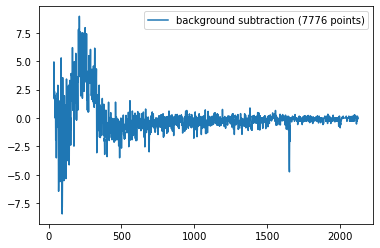

In [231]:
x_sub = x_back_smoothed if len(x_source_smoothed) >= len(x_back_smoothed) else x_source_smoothed

L=len(x_sub)

y_sub = y_source_smoothed[0:L]-y_back_smoothed
x_sub_smoothed = moving_average(x_sub, smooth)
y_sub_smoothed = moving_average( y_sub, smooth)
# plt.semilogy(moving_average(x_sub, smooth),moving_average( y_sub, smooth), label="background subtraction (%d points)"% len(x_sub))
plt.plot(x_sub_smoothed,y_sub_smoothed, label="background subtraction (%d points)"% len(x_sub_smoothed))
plt.legend()
plt.show()

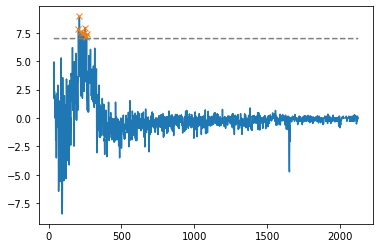

In [232]:
height_peak=7
peaks, _ = find_peaks(y_sub_smoothed, height=height_peak)
plt.plot(x_sub_smoothed,y_sub_smoothed)
plt.plot(x_sub_smoothed[peaks], y_sub_smoothed[peaks], "x")
plt.plot(x_sub_smoothed,np.zeros_like(y_sub_smoothed)+height_peak, "--", color="gray")
plt.show()

In [233]:
x_sub_smoothed[peaks]
Eout_keV=np.mean(x_sub_smoothed[peaks])
Ein_keV=Ein_137Cs
print("Ein(keV): ",Ein_keV,"Eout(keV): ",Eout_keV)

Ein(keV):  657.4078602620087 Eout(keV):  236.79885977680735


In [234]:
Ein=Ein_keV*keV
Eout=Eout_keV*keV
alpha=np.arccos(1- ((Ein/Eout) - 1 )/(Ein/(m_e*C**2) ))
alpha=alpha / np.pi*180
print("Compton scattering angle is ",alpha," degree")
# Eout/keV

Compton scattering angle is  112.374043557481  degree


##### the relative Compton scattering cross section as a function of angle for germanium

In [235]:
thita=alpha/180*np.pi
P=1/(1 + (Ein/(m_e*C**2)*(1-np.cos(thita))) )
d_cross_sec=1/2 * fine_str**2 * red_Comp_wl**2 * P**2 * (P+1/P-np.sin(thita)**2)
print("the relative Compton scattering cross section",d_cross_sec," m2")

the relative Compton scattering cross section 1.1758135785450298e-30  m2


<function matplotlib.pyplot.show(*args, **kw)>

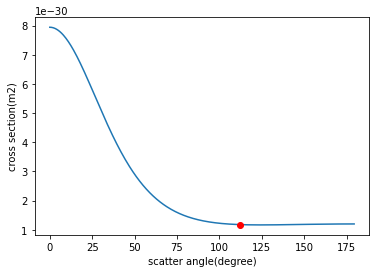

In [236]:
# Ein=657*keV
kk=np.arange(0,180,0.5)
thita=kk/180*np.pi
P=1 / (1 + (Ein / (m_e * C**2) * (1-np.cos(thita)) ) )
d_cross_sec=1/2 * fine_str**2 * red_Comp_wl**2 * P**2 * (P+1/P-np.sin(thita)**2)
# print("the relative Compton scattering cross section",d_cross_sec," m2")
plt.plot(kk,d_cross_sec)
plt.plot(112.37404355748097,1.17581357854503e-30,'ro')
plt.xlabel('scatter angle(degree)')
plt.ylabel('cross section(m2)')
plt.show

In [237]:
# d_cross_sec

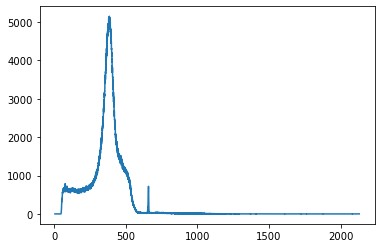

In [238]:
s6 = mca.Mca("G1_TAC_GATED.MCA")
s6.plot()

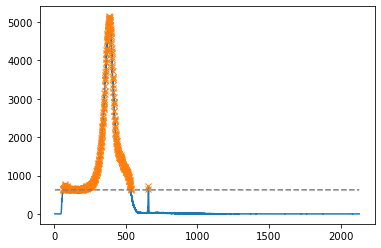

In [239]:
x6, y6 = s6.get_points(calibration_method="interpolation")

height_peak=626
peaks, _ = find_peaks(y6, height=height_peak)
plt.plot(x6,y6)
plt.plot(x6[peaks], y6[peaks], "x")
plt.plot(x6,np.zeros_like(y6)+height_peak, "--", color="gray")
plt.show()


In [240]:
# print(x6[peaks])

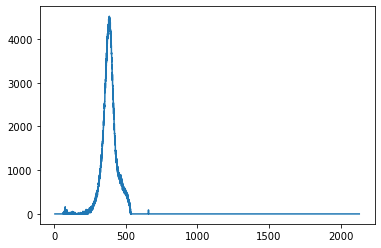

In [241]:
y_no_noise2=np.zeros(y6.shape)
y_no_noise1=y6-np.mean(y6[np.logical_and(x6<245 , x6>58)])
y_no_noise2[y_no_noise1>0]=y_no_noise1[y_no_noise1>0]
plt.plot(x6,y_no_noise2)

In [242]:
D2_all_solid_angle_all_time=sum(y_no_noise2) #s6

In [243]:

real_time6 = float(s6.get_variable("REAL_TIME"))
real_time6

80837.24

In [244]:
D1_all_area_all_time


228168.89525193867

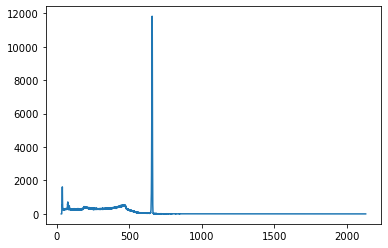

In [245]:
plt.plot(x3,y3)

In [246]:
# detector 1 
y3_D1=y3[np.logical_and(x3>646,x3<668)]
y3_s1=y3_D1[y3_D1>90]
print(x3[y3==y3_s1[0]],x3[y3==y3_s1[-1]])
# for i in range(1,2*N):
    
#     print(x3[np.argmax(y3)-N+i],'    ',y3[np.argmax(y3)-N+i])

[647.47925764] [542.02139738 545.50982533 555.17008734 662.77467249]


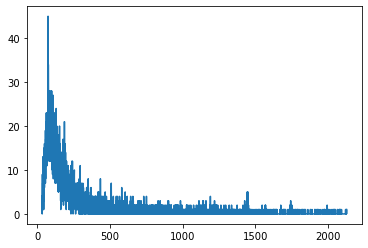

In [247]:
s2 = mca.Mca("ENERGY_SPECTRUM_D1_BACKGROUND.MCA")
x2, y2 = s2.get_points(calibration_method="interpolation")
real_time2 = float(s2.get_variable("REAL_TIME"))
s2.plot()

In [248]:
sum(y2)/real_time2

177.2109467978024

In [249]:
y2_D1_noise=y2[np.logical_and(x2>647.47925764,x2<662.77467249)]

In [264]:
print(real_time3,real_time2)

62.613333 73.573333


## cross section

In [251]:
y3_no_back=y3_s1-y2_D1_noise*real_time3/real_time2
D1_all_area_all_time=sum(y3_no_back)

In [282]:
r_sec_D2=0.03
area_D2=np.pi*r_sec_D2**2
R=0.1
solid_angle = area_D2 / R**2
l= 10**np.arange(-9,-3,0.2)
area_source = l**2
print(D1_all_area_all_time,real_time3)
print(D2_all_solid_angle_all_time,real_time6)

cr_sec=(D2_all_solid_angle_all_time / (real_time6*solid_angle)) / (D1_all_area_all_time / (real_time3*area_source))

228168.89525193867 62.613333
1502857.8909612966 80837.24


In [283]:
AA=1.1758135785450298e-30*(real_time6*solid_angle)*(D1_all_area_all_time /(D2_all_solid_angle_all_time* real_time3))
AA

6.516494477907942e-29

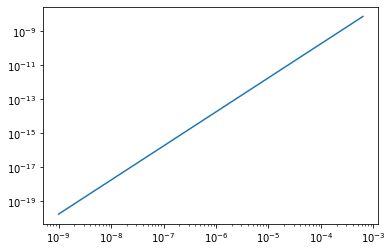

In [277]:
plt.loglog(l,cr_sec)

In [254]:
# 137Cs of D2
print("time of 137Cs of D2: ",real_time5)
print("time of background of D2: ",real_time4)

time of 137Cs of D2:  86.773333
time of background of D2:  117.213333


In [255]:
# background of D2
kn=sum(y5)/sum(y4)
kt=real_time5/real_time4
print(kn,'\n',kt)

1.7319854847071021 
 0.7403025814477948


In [256]:
sum(y5)/real_time5

231.01567390525383

In [257]:
y_5minu4=y5[0:L]-y4[0:L]
y_5minu4_n=y5[0:L]-y4[0:L]*kn
y_5minu4_t=y5[0:L]-y4[0:L]*kt
print(moving_average(x_sub, smooth)[1:10],x_sub[1:10])

[36.46768559 36.7360262  37.00436681 37.27270742 37.54104803 37.80938865
 38.07772926 38.34606987 38.61441048] [35.79683406 36.06517467 36.33351528 36.6018559  36.87019651 37.13853712
 37.40687773 37.67521834 37.94355895]


In [258]:
# y_5minu4.size
ykk=moving_average(y_5minu4_t, smooth)

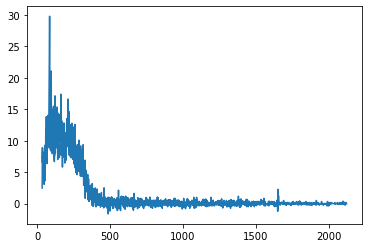

In [259]:
plt.plot(x4[0:len(ykk)],ykk)

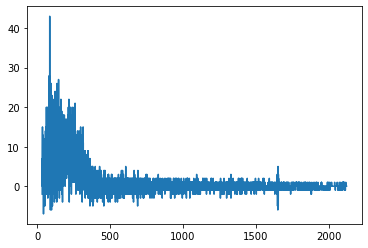

In [260]:
plt.plot(x4[0:L],y_5minu4)

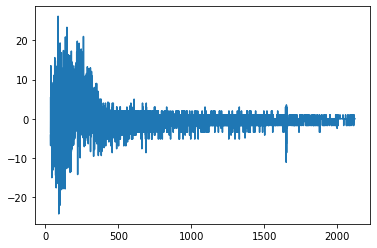

In [261]:
plt.plot(x4[0:L],y_5minu4_n)

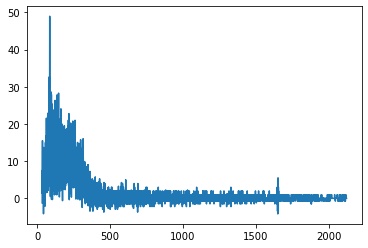

In [262]:
plt.plot(x4[0:L],y_5minu4_t)

In [263]:
real_time6

80837.24